In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
import sklearn.ensemble as ske
from sklearn import datasets, svm, cross_validation, tree, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib as plt
%matplotlib inline

/home/zectrosan/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv("train.csv")
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",False,31.0,1,1,363291,20.5250,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
1,3,0,"Karlsson, Mr. Nils August",True,22.0,0,0,350060,7.5208,NaN,S,NaN,NaN,NaN
2,3,1,"O'Leary, Miss. Hanora ""Norah""",False,NaN,0,0,330919,7.8292,NaN,Q,13,NaN,NaN
3,1,0,"Douglas, Mr. Walter Donald",True,50.0,1,0,PC 17761,106.4250,C86,C,NaN,62.0,"Deephaven, MN / Cedar Rapids, IA"
4,2,1,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",False,40.0,1,1,29750,39.0000,NaN,S,14,NaN,"Cape Town, South Africa / Seattle, WA"


In [3]:
test = pd.read_csv("test.csv")
test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,"Rintamaki, Mr. Matti",True,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S,NaN,NaN,NaN
1,3,"Nakid, Mr. Sahid",True,20.0,1,1,2653,15.7417,NaN,C,C,NaN,NaN
2,3,"Lyntakoff, Mr. Stanko",True,NaN,0,0,349235,7.8958,NaN,S,NaN,NaN,NaN
3,3,"Ford, Mr. Arthur",True,NaN,0,0,A/5 1478,8.0500,NaN,S,NaN,NaN,"Bridgwater, Somerset, England"
4,3,"Shaughnessy, Mr. Patrick",True,NaN,0,0,370374,7.7500,NaN,Q,NaN,NaN,NaN


In [4]:
genders = {True: 1, False: 0}
train["sexF"] = train["sex"].apply(lambda s: genders.get(s))
test["sexF"] = test["sex"].apply(lambda s: genders.get(s))

In [5]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sexF
0,3,1,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",False,31.0,1,1,363291,20.5250,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI",0
1,3,0,"Karlsson, Mr. Nils August",True,22.0,0,0,350060,7.5208,NaN,S,NaN,NaN,NaN,1
2,3,1,"O'Leary, Miss. Hanora ""Norah""",False,NaN,0,0,330919,7.8292,NaN,Q,13,NaN,NaN,0
3,1,0,"Douglas, Mr. Walter Donald",True,50.0,1,0,PC 17761,106.4250,C86,C,NaN,62.0,"Deephaven, MN / Cedar Rapids, IA",1
4,2,1,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",False,40.0,1,1,29750,39.0000,NaN,S,14,NaN,"Cape Town, South Africa / Seattle, WA",0


In [6]:
titanic = train.groupby('pclass').mean()
titanic

,survived,sex,age,sibsp,parch,fare,body,sexF
pclass,,,,,,,,
1,0.596000,0.556000,38.120624,0.460000,0.356000,88.451434,156.785714,0.556000
2,0.400000,0.637209,29.735702,0.427907,0.334884,21.197208,174.480000,0.637209
3,0.248201,0.687050,24.683879,0.588129,0.435252,13.496553,154.500000,0.687050


In [7]:
class_sex_grouping = train.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body  \
pclass sex                                                                      
1      False  0.963964  36.009709  0.567568  0.486486  111.312764         NaN   
       True   0.302158  39.994972  0.374101  0.251799   70.195264  156.785714   
2      False  0.897436  28.130483  0.589744  0.615385   23.205181         NaN   
       True   0.116788  30.688802  0.335766  0.175182   20.053983  174.480000   
3      False  0.465517  21.662535  0.816092  0.821839   16.008479  183.000000   
       True   0.149215  26.008454  0.484293  0.259162   12.349375  149.108108   

              sexF  
pclass sex          
1      False   0.0  
       True    1.0  
2      False   0.0  
       True    1.0  
3      False   0.0  
       True    1.0

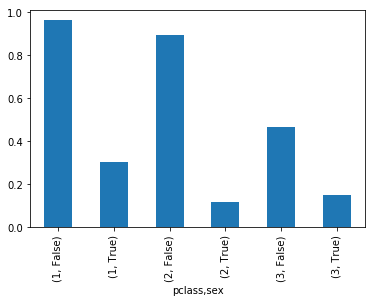

In [8]:
class_sex_grouping['survived'].plot(kind="bar")

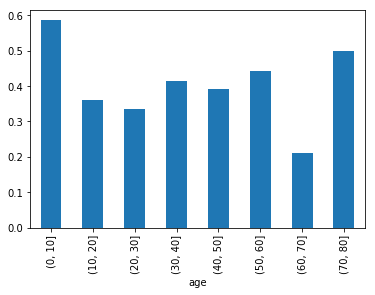

In [10]:
group_by_age = pd.cut(train["age"], np.arange(0, 90, 10))
age_grouping = train.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()

In [11]:
train.count()

pclass       1021
survived     1021
name         1021
sex          1021
age           820
sibsp        1021
parch        1021
ticket       1021
fare         1020
cabin         227
embarked     1020
boat          367
body           97
home.dest     579
sexF         1021
dtype: int64

In [12]:
train_new = train.drop(['cabin','name','ticket','sex','embarked','home.dest','boat','body'], axis=1)
train_new = train_new.dropna(axis=0, how='any')
train_new.count()

pclass      819
survived    819
age         819
sibsp       819
parch       819
fare        819
sexF        819
dtype: int64

In [13]:
X = train_new.drop(['survived'], axis=1).values
y = train_new['survived'].values

In [14]:
len(X)

819

In [15]:
# For test.csv
median_ages_test = np.zeros((2,3))

In [16]:
for i in range(0,2):
    for j in range(0,3):
        median_ages_test[i,j] = test[(test['sexF'] == i) & (test['pclass'] == j+1)]['age'].dropna().median()
        
median_ages_test

array([[ 39. ,  24. ,  22. ],
       [ 46. ,  28.5,  26. ]])

In [17]:
test['ageFill'] = test['age']
test[test['age'].isnull()][['age', 'ageFill', 'sexF', 'pclass']].head(10)
 
for i in range(0, 2):
    for j in range(0, 3):
        test.loc[(test.age.isnull()) & (test.sexF == i) & (test.pclass == j+1),'ageFill'] = median_ages_test[i,j]

In [18]:
test.count()

pclass       288
name         288
sex          288
age          226
sibsp        288
parch        288
ticket       288
fare         288
cabin         68
embarked     287
boat         119
body          24
home.dest    166
sexF         288
ageFill      288
dtype: int64

In [19]:
test_new = test.drop(['cabin','name','ticket','sex','embarked','home.dest','boat','body','age'], axis=1)
test_new.count()

pclass     288
sibsp      288
parch      288
fare       288
sexF       288
ageFill    288
dtype: int64

In [20]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.33)

In [21]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [22]:
clf_dt.fit(X_train, y_train)
clf_dt.score(X_test, y_test)

0.75645756457564572

In [23]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=50)
bdt.fit(X_train, y_train)
bdt.score(X_test, y_test)

0.7859778597785978

In [24]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)

In [25]:
clf_gb.fit(X_train, y_train)
clf_gb.score(X_test, y_test)

0.80811808118081185

In [26]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)

In [27]:
clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

0.80073800738007384

In [28]:
prediction_rf = clf_rf.predict(test_new.values)

In [29]:
df_output_rf = pd.DataFrame({
    'survived': prediction_rf
})

In [31]:
df_output_rf.to_csv("/home/zectrosan/Documents/python/data/titanic/gdg/gdg-prelims-2017/survivors/output_rf.csv", sep=',')

In [32]:
prediction_gb = clf_gb.predict(test_new.values)

In [33]:
df_output_gb = pd.DataFrame({
    'survived': prediction_gb
})

In [34]:
df_output_gb.to_csv("/home/zectrosan/Documents/python/data/titanic/gdg/gdg-prelims-2017/survivors/output_gb.csv", sep=',')